In [102]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
df = pd.read_csv('all_caseolap.csv', index_col='entity')

# Print the DataFrame
df


,CM,ARR,CHD,VD,IHD,CCD,VOO,OTH
entity,,,,,,,,
P17677,5.221547e-05,0.001205,0.000000,0.000000,0.000750,0.000023,0.000000,0.000007
Q99727,8.946857e-07,0.000002,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
Q9BZF1,4.493435e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9Y4P1,1.503177e-05,0.000000,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000
Q9UEE9,0.000000e+00,0.000000,0.000000,0.000019,0.000030,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
Q01432,8.947306e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001
Q02127,8.947495e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9UKV8,1.072643e-05,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000007


[Text(0.5, 1.0, 'Popularity Scores'), Text(0, 0.5, 'Log of Popularity Score')]

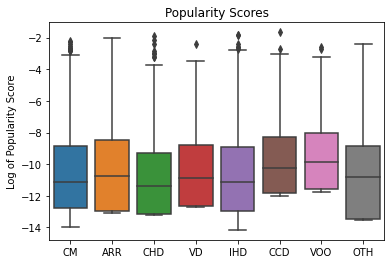

In [104]:
import seaborn as sns 
import numpy as np 
df2 = df[df != 0]
df2 = np.log(df2)
sns.boxplot(data=df2).set(title='Popularity Scores', ylabel= 'Log of Popularity Score')

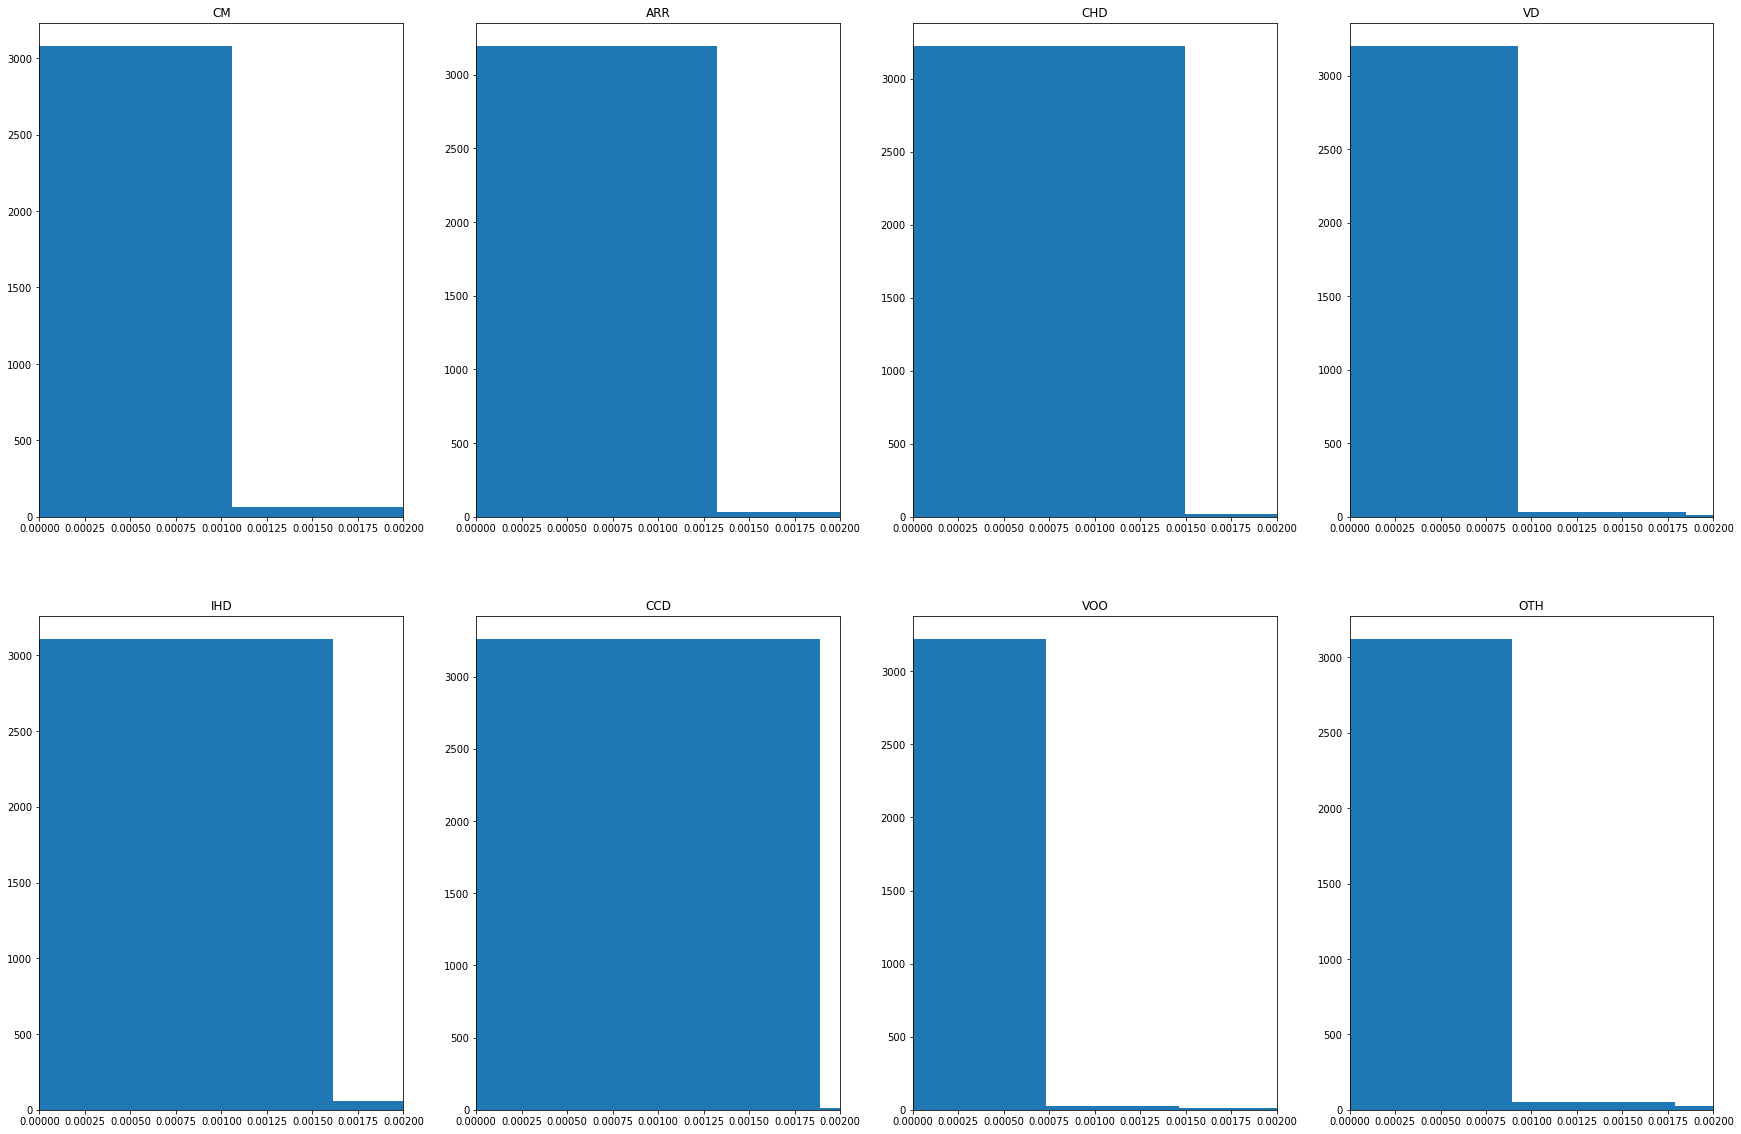

In [19]:
import matplotlib.pyplot as plt 
f,a = plt.subplots(2,4, figsize=(30,20))
a = a.ravel()
titles = df.columns
for idx,ax in zip(df, a):
    data = df[idx]
    #data = data[data > 0.001]
    ax.hist(data, log = False, bins = 100)
    ax.set_title(idx)
    ax.set_xlim([0,0.002])
plt.show()

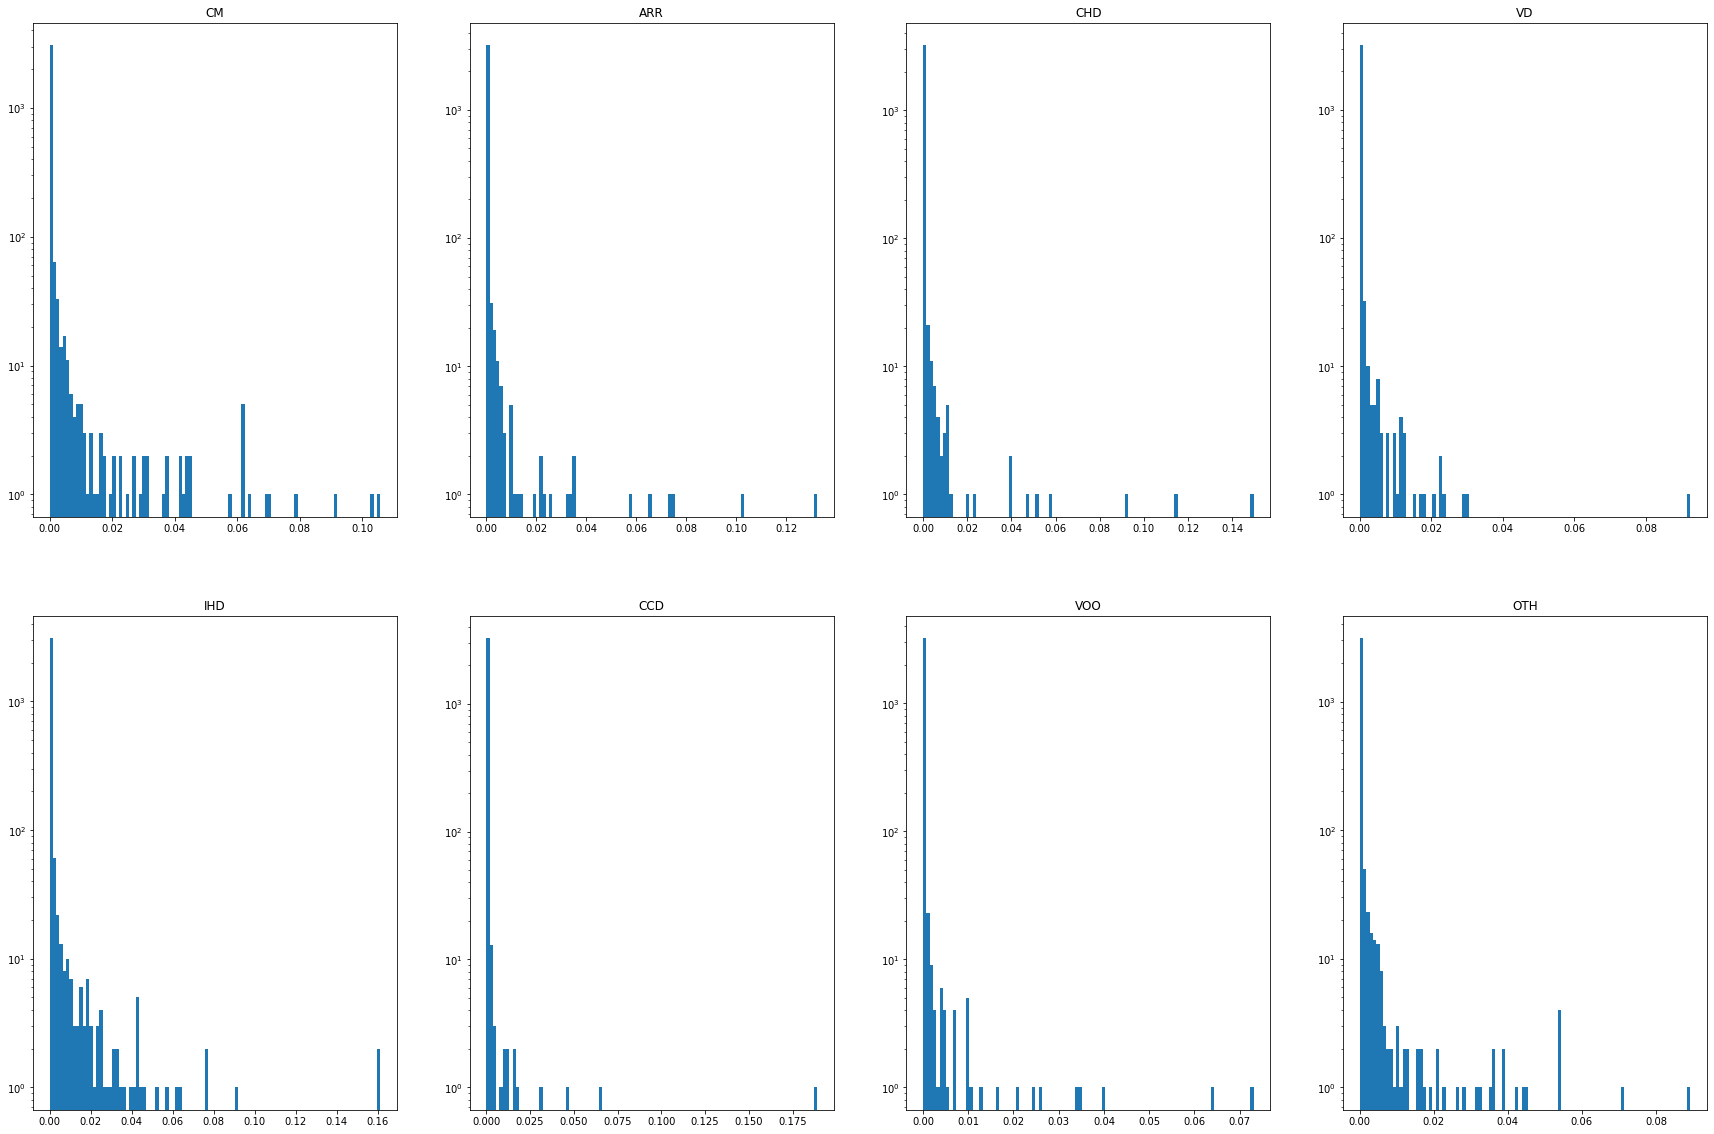

In [16]:
import matplotlib.pyplot as plt 
f,a = plt.subplots(2,4, figsize=(30,20))
a = a.ravel()
titles = df.columns
for idx,ax in zip(df, a):
    data = df[idx]
    ax.hist(data, log = True, bins = 100)
    ax.set_title(idx)
plt.show()

In [13]:
titles = df.columns
titles

Index(['CM', 'ARR', 'CHD', 'VD', 'IHD', 'CCD', 'VOO', 'OTH'], dtype='object')

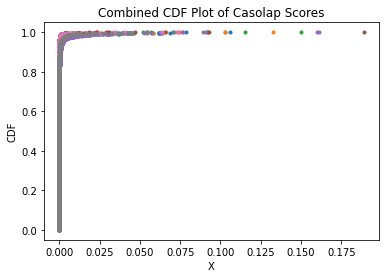

In [14]:
import numpy as np
import matplotlib.pyplot as plt

for i,d in enumerate(df):
    data = df[d]
    # Compute the CDF
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    #plot CDF 
    plt.plot(sorted_data, y, marker='.', linestyle='none')
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.title('Combined CDF Plot of Casolap Scores')


In [16]:
import scipy.stats as stats 
cols = df.columns
import itertools 
combinations_list = list(itertools.combinations(cols,2))
combinations_list

[('CM', 'ARR'),
 ('CM', 'CHD'),
 ('CM', 'VD'),
 ('CM', 'IHD'),
 ('CM', 'CCD'),
 ('CM', 'VOO'),
 ('CM', 'OTH'),
 ('ARR', 'CHD'),
 ('ARR', 'VD'),
 ('ARR', 'IHD'),
 ('ARR', 'CCD'),
 ('ARR', 'VOO'),
 ('ARR', 'OTH'),
 ('CHD', 'VD'),
 ('CHD', 'IHD'),
 ('CHD', 'CCD'),
 ('CHD', 'VOO'),
 ('CHD', 'OTH'),
 ('VD', 'IHD'),
 ('VD', 'CCD'),
 ('VD', 'VOO'),
 ('VD', 'OTH'),
 ('IHD', 'CCD'),
 ('IHD', 'VOO'),
 ('IHD', 'OTH'),
 ('CCD', 'VOO'),
 ('CCD', 'OTH'),
 ('VOO', 'OTH')]

In [42]:
mwu_stat = {}
for item in combinations_list:
    a,b  = stats.mannwhitneyu(df[item[0]], df[item[1]])
    mwu_stat[item] = b

df = pd.DataFrame.from_dict(mwu_stat, columns = ['MannWhitney Test p value'],  orient='index')
df = df.sort_values('MannWhitney Test p value')

from IPython.display import display 
display(df)

,MannWhitney Test p value
"(IHD, VOO)",0.000000e+00
"(IHD, CCD)",0.000000e+00
"(CM, CCD)",0.000000e+00
"(CM, VOO)",0.000000e+00
"(CCD, OTH)",5.715579e-200
"(VOO, OTH)",1.675456e-183
"(VD, IHD)",6.582413e-174
"(CM, VD)",3.130274e-154
"(ARR, IHD)",2.479571e-130
"(CM, ARR)",5.802802e-119


<AxesSubplot:>

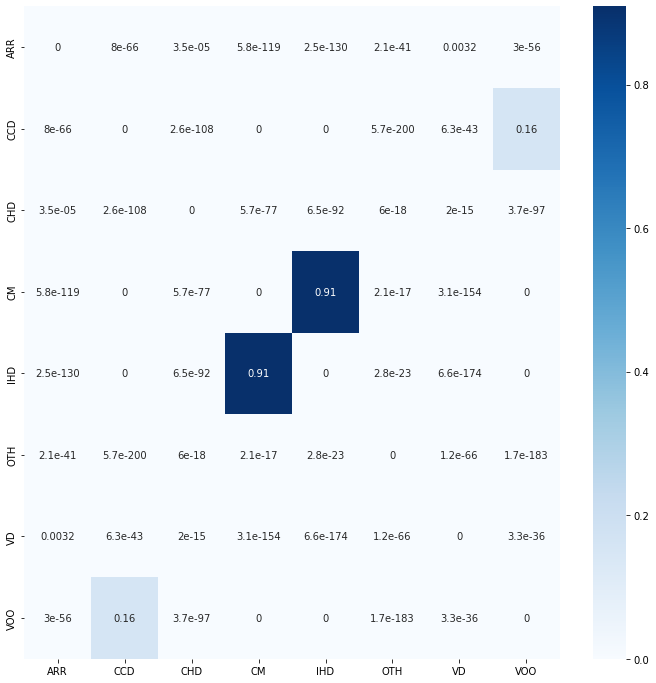

In [43]:
import pandas as pd

keys = list(mwu_stat.keys())
labels = [x for pair in keys for x in pair]
labels = list(set(labels))
labels.sort()

matrix = pd.DataFrame(0, index=labels, columns=labels)

for pair, value in mwu_stat.items():
   i, j = pair
   matrix.loc[i, j] = value
   matrix.loc[j, i] = value

import seaborn as sns 

fig,ax = plt.subplots(figsize=(12,12))

sns.heatmap(matrix,cmap='Blues',annot=True, ax=ax)


In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('all_popularity_score.csv', index_col='entity')

df

,CM,ARR,CHD,VD,IHD,CCD,VOO,OTH
entity,,,,,,,,
P17677,0.195999,0.344622,0.000000,0.000000,0.333628,0.131586,0.000000,0.104338
Q99727,0.061831,0.070232,0.000000,0.000000,0.095733,0.000000,0.000000,0.000000
Q9BZF1,0.097999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9Y4P1,0.173581,0.000000,0.000000,0.000000,0.181203,0.000000,0.000000,0.000000
Q9UEE9,0.000000,0.000000,0.000000,0.149641,0.181203,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
Q01432,0.061831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065830
Q02127,0.061831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9UKV8,0.123661,0.000000,0.000000,0.000000,0.120802,0.000000,0.000000,0.104338


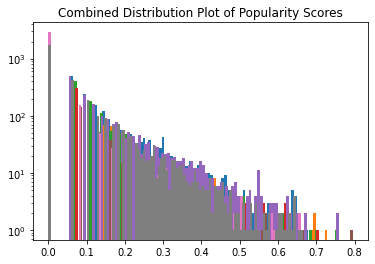

In [45]:
for i,d in enumerate(df):
    plt.hist(df[d], log = True, bins = 100);
    plt.title('Combined Distribution Plot of Popularity Scores'.format(i+1))
    plt.show

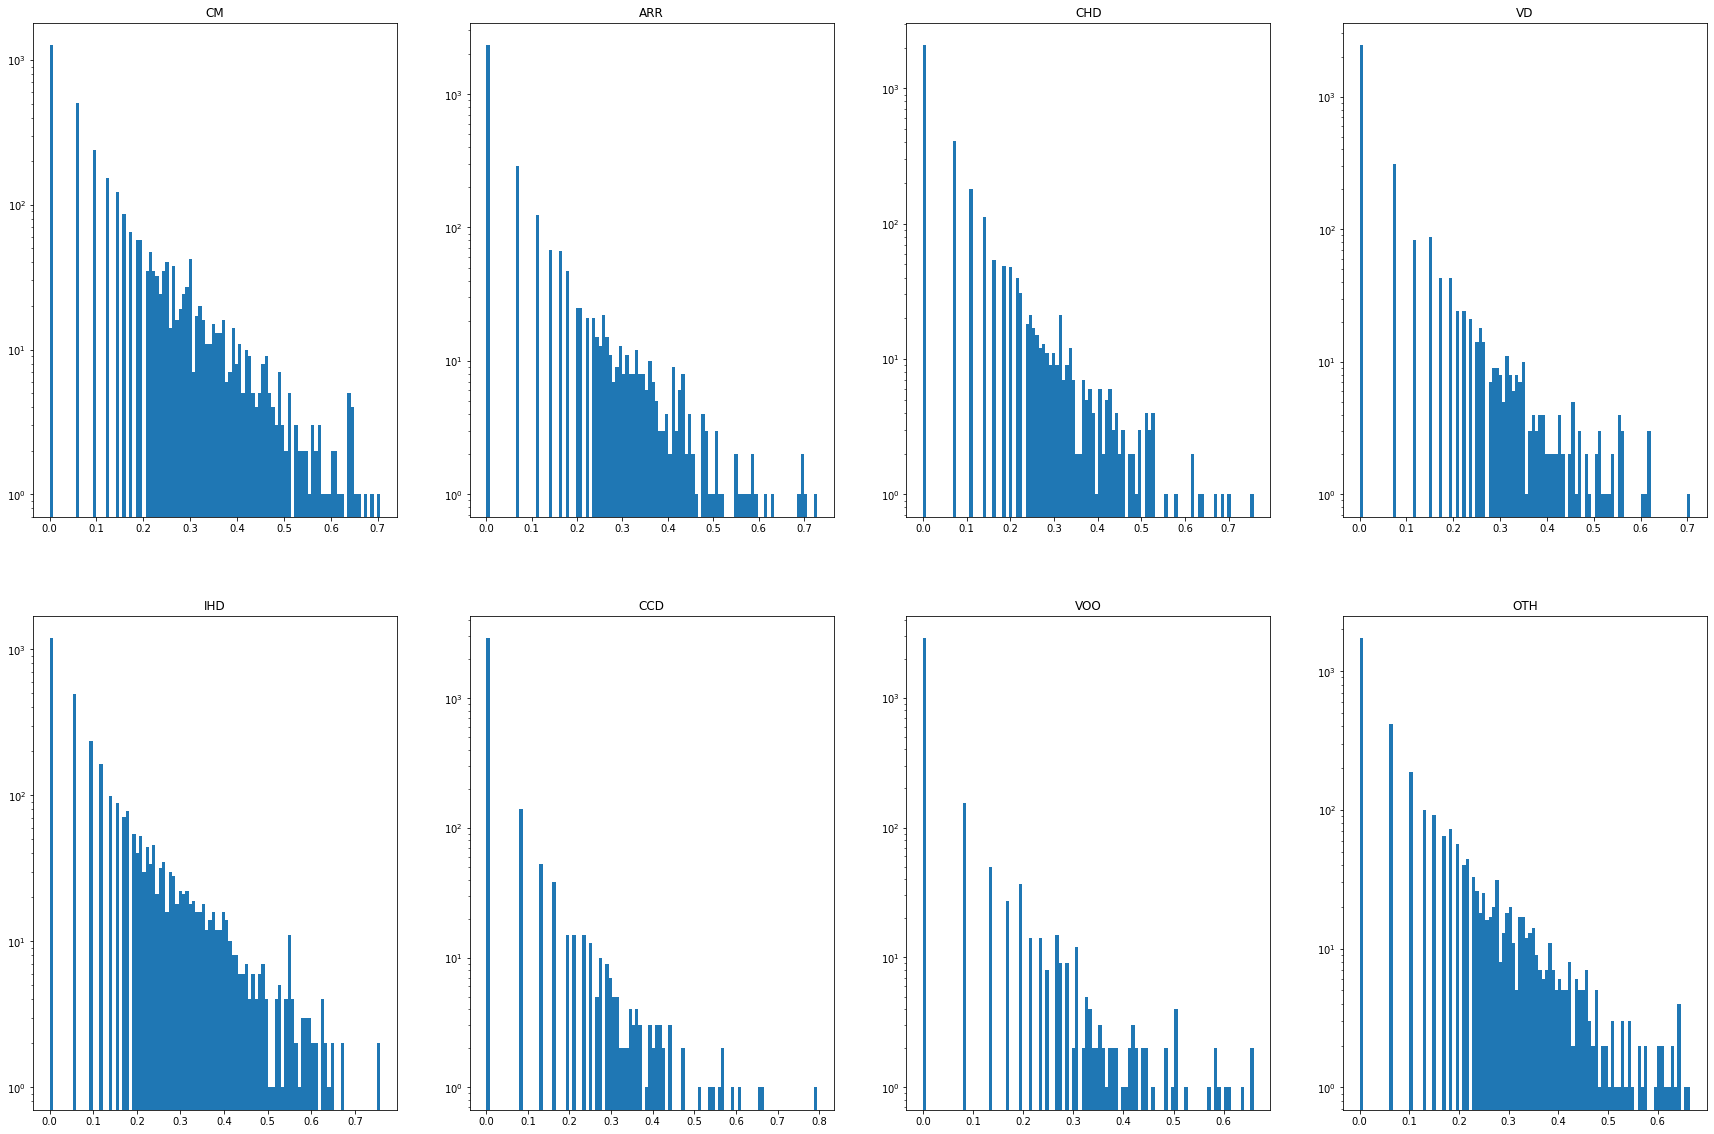

In [46]:

f,a = plt.subplots(2,4, figsize=(30,20))
a = a.ravel()
titles = df.columns
for idx,ax in zip(df, a):
    data = df[idx]
    #data = data[data > 0.001]
    ax.hist(data, log = True, bins = 100)
    ax.set_title(idx)
plt.show()

[Text(0.5, 1.0, 'Popularity Scores')]

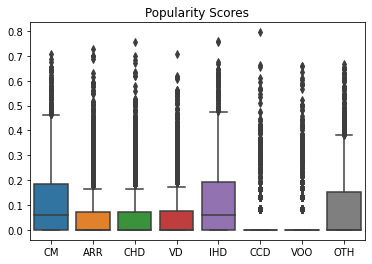

In [83]:
import seaborn as sns 
sns.boxplot(data=df).set(title='Popularity Scores')

In [47]:
import scipy.stats as stats 
cols = df.columns
import itertools 
combinations_list = list(itertools.combinations(cols,2))
combinations_list

[('CM', 'ARR'),
 ('CM', 'CHD'),
 ('CM', 'VD'),
 ('CM', 'IHD'),
 ('CM', 'CCD'),
 ('CM', 'VOO'),
 ('CM', 'OTH'),
 ('ARR', 'CHD'),
 ('ARR', 'VD'),
 ('ARR', 'IHD'),
 ('ARR', 'CCD'),
 ('ARR', 'VOO'),
 ('ARR', 'OTH'),
 ('CHD', 'VD'),
 ('CHD', 'IHD'),
 ('CHD', 'CCD'),
 ('CHD', 'VOO'),
 ('CHD', 'OTH'),
 ('VD', 'IHD'),
 ('VD', 'CCD'),
 ('VD', 'VOO'),
 ('VD', 'OTH'),
 ('IHD', 'CCD'),
 ('IHD', 'VOO'),
 ('IHD', 'OTH'),
 ('CCD', 'VOO'),
 ('CCD', 'OTH'),
 ('VOO', 'OTH')]

In [48]:
mwu_stat = {}
for item in combinations_list:
    a,b  = stats.mannwhitneyu(df[item[0]], df[item[1]])
    mwu_stat[item] = b


In [49]:
for pair, value in mwu_stat.items():
    print(pair,value)

('CM', 'ARR') 1.1356863974506027e-126
('CM', 'CHD') 1.141570943908158e-81
('CM', 'VD') 4.505088253632962e-169
('CM', 'IHD') 0.9406115190283059
('CM', 'CCD') 0.0
('CM', 'VOO') 0.0
('CM', 'OTH') 4.527601525514624e-18
('ARR', 'CHD') 4.4311548593804484e-11
('ARR', 'VD') 0.003477408217933682
('ARR', 'IHD') 2.782800763277893e-146
('ARR', 'CCD') 3.678533739373257e-67
('ARR', 'VOO') 2.3459073607964713e-59
('ARR', 'OTH') 1.1573176348305923e-43
('CHD', 'VD') 3.4126019374567553e-16
('CHD', 'IHD') 3.3382492282999627e-98
('CHD', 'CCD') 1.876383417499771e-113
('CHD', 'VOO') 2.0739926135037345e-103
('CHD', 'OTH') 7.791888838600174e-18
('VD', 'IHD') 1.810138478108135e-192
('VD', 'CCD') 6.602174610840243e-44
('VD', 'VOO') 2.219247428542074e-37
('VD', 'OTH') 6.360716605838968e-70
('IHD', 'CCD') 0.0
('IHD', 'VOO') 0.0
('IHD', 'OTH') 6.234605895399192e-27
('CCD', 'VOO') 0.1567068472990677
('CCD', 'OTH') 7.938074763815418e-212
('VOO', 'OTH') 9.66841243892115e-198


<AxesSubplot:>

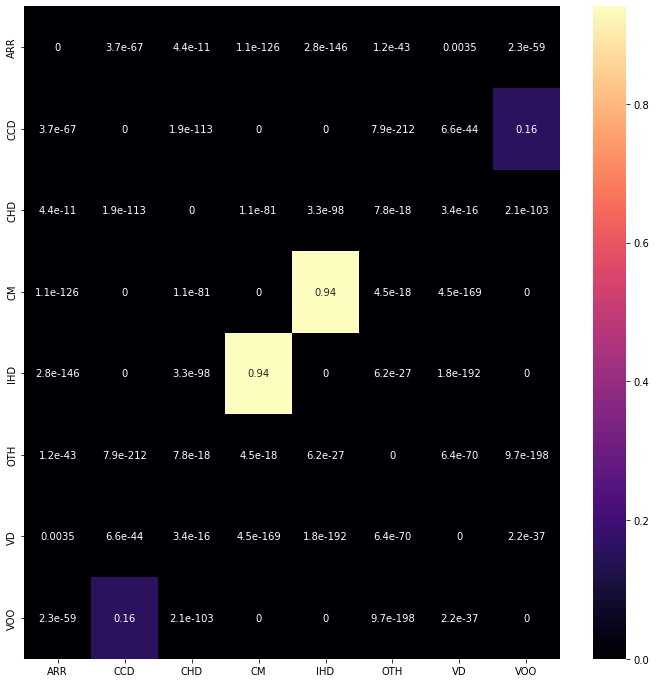

In [50]:
import pandas as pd

keys = list(mwu_stat.keys())
labels = [x for pair in keys for x in pair]
labels = list(set(labels))
labels.sort()

matrix = pd.DataFrame(0, index=labels, columns=labels)

for pair, value in mwu_stat.items():
   i, j = pair
   matrix.loc[i, j] = value
   matrix.loc[j, i] = value

import seaborn as sns 

fig,ax = plt.subplots(figsize=(12,12))

sns.heatmap(matrix,cmap='magma',annot=True, ax=ax)


In [54]:
df

,CM,ARR,CHD,VD,IHD,CCD,VOO,OTH
entity,,,,,,,,
P17677,0.195999,0.344622,0.000000,0.000000,0.333628,0.131586,0.000000,0.104338
Q99727,0.061831,0.070232,0.000000,0.000000,0.095733,0.000000,0.000000,0.000000
Q9BZF1,0.097999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9Y4P1,0.173581,0.000000,0.000000,0.000000,0.181203,0.000000,0.000000,0.000000
Q9UEE9,0.000000,0.000000,0.000000,0.149641,0.181203,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
Q01432,0.061831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065830
Q02127,0.061831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9UKV8,0.123661,0.000000,0.000000,0.000000,0.120802,0.000000,0.000000,0.104338


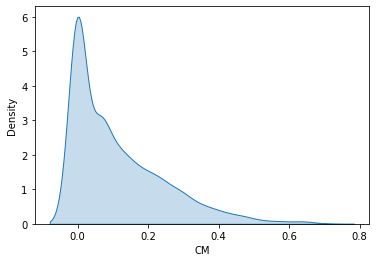

In [75]:
'''KDE Plot'''
import seaborn as sns 
data = df.CM 
sns.kdeplot(data, bw= None, shade=True);

In [20]:
df.index[1]

'Q99727'

In [30]:
ps_prot = df.CM[1]
ps_prot

0.0618307244170738

In [29]:
df.CM

entity
P17677    0.195999
Q99727    0.061831
Q9BZF1    0.097999
Q9Y4P1    0.173581
Q9UEE9    0.000000
            ...   
Q01432    0.061831
Q02127    0.061831
Q9UKV8    0.123661
P01019    0.481934
P98066    0.000000
Name: CM, Length: 3288, dtype: float64

In [48]:

# Specify the value to compare the distribution against
ps_prot = df.CM[1]

import numpy as np
from scipy.stats import gaussian_kde

kde = gaussian_kde(df.CM)

# Obtain the p-value for a statistic of 0.5
statistic = ps_prot
p_value = (kde.integrate_box_1d(-np.inf, statistic))
print(df.index[1], 'has a popularity score of: ', statistic)
print("p-value for protein ", df.index[1], 'is:', p_value)



Q99727 has a popularity score of:  0.0618307244170738
p-value for protein  Q99727 is: 0.4649983018119762
